# Symbolic Math (symy)
`sympy` is a symbolic maths library for Python. `sympy` can be installed using either `pip` or `conda`, but is shiped with the Anaconda distribution of Python.

```python
import sympy
help(sympy)
```
```
Help on package sympy:

NAME
    sympy

DESCRIPTION
    SymPy is a Python library for symbolic mathematics. It aims to become a
    full-featured computer algebra system (CAS) while keeping the code as simple
    as possible in order to be comprehensible and easily extensible.  SymPy is
    written entirely in Python. It depends on mpmath, and other external libraries
    may be optionally for things like plotting support.
    
    See the webpage for more information and documentation:
    
        http://sympy.org
```

## Symbols

Symbols are what `sympy` calls algebraic variables that are used in your mathematical expressions.

In [13]:
from sympy import symbols
x,y = symbols('x y')
print(2*x + y)
type(x+y/2)

2*x + y


sympy.core.add.Add

The symbols are not "normal" Python numeric variables.  As can be seen Python did not attempt to perform an arithmetic operation on x and y but creates an algebraic expression.

The `sympy.abc` module can be used to export predefined symbols, making your code a little neater:

In [27]:
from sympy.abc import x, y
print(x**2 + 2*x + y)
(x**2 + 2*x + y).evalf(subs={x:5,y:2})

x**2 + 2*x + y


37.0000000000000

Note that `sympy` algebraic expressions follow the same conventions as Python arithmetic. For example: `2*x` and not `2x`, `x**2` and not `x^2`.

## Algebra
Expand products and powers

Expand ($(x+y)^2 (x+1)$) :

In [61]:
init_printing() 
((x+y)**2 * (x+1)).expand()

Simplify a formula

Simplify ( $\frac{1}{x} + \frac{x \sin x - 1}{x}$) :

In [62]:
 a = 1/x + (x*sin(x) - 1)/x
 simplify(a)

Solve a polynomial equation

Find the roots of ( $x^3 + 2x^2 + 4x + 8$) :

In [63]:
solve(Eq(x**3 + 2*x**2 + 4*x + 8, 0), x)

or more easily:

In [64]:
solve(x**3 + 2*x**2 + 4*x + 8, x)

For details, see: Finding roots of polynomials.
Solve an equation system

Solve the equation system ( $(x+5y=2, -3x+6y=15$)) :

In [65]:
solve([Eq(x + 5*y, 2), Eq(-3*x + 6*y, 15)], [x, y]) 

or

In [66]:
solve([x + 5*y - 2, -3*x + 6*y - 15], [x, y])

Solve a recurrence relation

Solve: $$ { y }{ 0 }=1,\quad { y }{ 1 }=4,\quad { y }{ n }=2{ y }{ n-1 }+5{ y }_{ n-2 } $$ 

In [67]:
f=Function('f')
var('y')

In [ ]:
var('n',integer=True)

In [ ]:
f = y(n)-2*y(n-1)-5*y(n-2)
rsolve(f,y(n),[1,4])

Calculate a sum

Evaluate ( $\sum_{n=a}^b 6 n^2 + 2^n$) :

In [ ]:
a, b = symbols('a b')
s = Sum(6*n**2 + 2**n, (n, a, b))

In [71]:
Sum(2**n + 6*n**2, (n, a, b))
s.doit()

Calculate a product

Evaluate ( $\prod_{n=1}^b n (n+1)$) :

In [72]:
 product(n*(n+1), (n, 1, b))

Solve a functional equation

Example: if  $f\left( \frac { 1 }{ x } \right) -3f\left( x \right)=x$  then find  $f\left( 2 f\right( ) $:

In [73]:
f=Function('f')
ex=Eq(f(1/x)-3*f(x),x)
ex.subs(x,2)

Or $f(1/2) - 3*f(2) == 2$

In [74]:
ex.subs(x,Rational(1,2))

In [75]:
solve([f(Rational(1,2))-3*f(2)-2,-3*f(Rational(1,2))+f(2)-Rational(1,2)])

### evalf
The `evalf` method can be used to arithmetically evaluate a sympy expression:
```
evalf(n=15, subs=None, maxn=100, chop=False, strict=False, quad=None, verbose=False) method of sympy.core.add.Add instance
    Evaluate the given formula to an accuracy of n digits.
    Optional keyword arguments:
    

        subs=<dict>
            Substitute numerical values for symbols, e.g.
            subs={x:3, y:1+pi}. The substitutions must be given as a
            dictionary.
    
        maxn=<integer>
            Allow a maximum temporary working precision of maxn digits
            (default=100)
    
        chop=<bool>
            Replace tiny real or imaginary parts in subresults
            by exact zeros (default=False)
    
        strict=<bool>
            Raise PrecisionExhausted if any subresult fails to evaluate
            to full accuracy, given the available maxprec
            (default=False)
    
        quad=<str>
            Choose algorithm for numerical quadrature. By default,
            tanh-sinh quadrature is used. For oscillatory
            integrals on an infinite interval, try quad='osc'.
    
        verbose=<bool>
            Print debug information (default=False)
```


A complete sympy tutorial can be found here: [sympy tutorial](http://docs.sympy.org/latest/tutorial/index.html)

## isympy

`isympy` is a wrapper for `ipython`.  `isympy` performs a couple of imports, created a few symbols and implement `isympy` specific pretty printing. As can be seen below.
![isympy.png](images/isympy.png)

## Numeric types
`sympy` has classes represenenting the following numeric types:
```
    ComplexInfinity
        ImaginaryUnit
        Number
            Float
            Infinity
            NaN
            NegativeInfinity
            Rational
                Integer
                    IntegerConstant
                        NegativeOne
                        One
                        Zero
                RationalConstant
                    Half
        NumberSymbol
            Catalan
            EulerGamma
            Exp1
            GoldenRatio
            Pi
```

In [32]:
Float(1/2)

0.500000000000000

In [33]:
Float(1/2,5)

0.50000

In [76]:
Rational(1/2)

In [77]:
N(GoldenRatio**2) # same as evalf()

In [36]:
type(I)

sympy.core.numbers.ImaginaryUnit

In [78]:
x + I*y

## Differentiation and Integration

Calculate a limit

Evaluate ( $\lim_{x\to 0} \frac{\sin x - x}{x^3}$) :

In [79]:
limit((sin(x)-x)/x**3, x, 0)

Calculate a Taylor series

Find the Maclaurin series of ( $\frac{1}{\cos x}) up to the ( O(x^6)$) term:

In [80]:
 (1/cos(x)).series(x, 0, 6)

Calculate a derivative

Differentiate ( $\frac{\cos(x^2)^2}{1+x}$) :

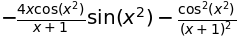

In [81]:
diff(cos(x**2)**2 / (1+x), x)

Calculate an integral

Calculate the indefinite integral ( $\int x^2 \cos x , dx$)

In [82]:
integrate(x**2 * cos(x), x)

Calculate the definite integral ( $\int_0^{\pi/2} x^2 \cos x , dx$) :

In [83]:
integrate(x**2 * cos(x), (x, 0, pi/2))

### Solve an ordinary differential equation

Solve ( $f''(x) + 9 f(x) = 1$) :

In [84]:
f = Function('f')
dsolve(Eq(Derivative(f(x),x,x) + 9*f(x), 1), f(x))

You can also use .diff(), like here (an example in isympy)

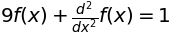

In [85]:
f = Function("f")
Eq(f(x).diff(x, x) + 9*f(x), 1)

In [86]:
dsolve(_, f(x))